<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CST2312/blob/main/CST2312_readCSVfiles_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CST2312 Read CSV Files

topical

#1. Read CSV Files With **`csv`** Module

**Reading**

From the python.org/library:

*   [csv - File Reading and Writing](https://docs.python.org/3/library/csv.html)

From RealPython:
*   [Reading and Writing CSV Files in Python](https://realpython.com/python-csv/)


**Video** from Corey Schafer on YouTube:
*   [Python Tutorial: CSV Module - How to Read, Parse, and Write CSV Files](https://www.youtube.com/watch?v=q5uM4VKywbA)

**Practice Files**

from John Burkardt, Florida State University (FSU) - distributed under the GNU LGPL license:
*   [CSV Files](https://people.sc.fsu.edu/~jburkardt/data/csv/csv.html)

from OWID, Our World in Data - distributed under the open license:
*   [Covid CSV Files](https://github.com/owid/covid-19-data/tree/master/public/data)


### Connecting to the Data Source (mounting Google Drive)  

*(Mounting a Drive)*

First, let's connect to Google Drive for acess to files, including **addresses.csv**.  To read files from Google Drive we will need to import the drive module from google.colab.  We will also need to have Google Drive give stream access to Google Colab.  If the files are on a different Google Drive account from the Google Colab account then be sure to have permission of the Google Drive owner for access to the file.

You can use the drive module from google.colab to mount your entire Google Drive to Colab by:

1. Executing the below code which will provide you with an authentication link

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

2. Open the link

3. Choose the Google account whose Drive you want to mount

4. Allow Google Drive Stream access to your Google Account

5. Copy the code displayed, paste it in the text box as shown below, and press Enter

Once the Drive is mounted, you’ll get the message “Mounted at /content/gdrive”, and you’ll be able to browse through the contents of your Drive from the file-explorer pane.

For this exercise we are using the file "addresses.csv" courtesy of John Burkardt of Florida State University.  If your Google Drive folder had the file "**addresses.csv**" within the "data" subdirectory of the "My Drive" folder then you would be able to open that file with the following code:

In [ ]:
csv_handle = open("/content/gdrive/My Drive/data/addresses.csv", "r")

ALternatively, we could grab the file from Github using `!curl`   


In [ ]:
!curl "https://raw.githubusercontent.com/ProfessorPatrickSlatraigh/data/main/addresses.csv" -o addresses.csv

If we pulled the file to our current directory, then our file handle can be opened with:     
    
```
csv_handle = open("/content/addresses.csv", "r")
```

In [ ]:
csv_handle = open("/content/addresses.csv", "r")

If your file is mounted as a local drive on your machine instead of on Google Drive, you can open the csv_handle with the following code -- *be sure to have the correct file path in the file name*:



```
csv_handle = open("addresses.csv", "r")
```



As in the earlier Google Colab example, you can now use a for loop to print the contents of "**addresses.csv**" in Google Drive

In [ ]:
# positioning the file handle at the start of the file
csv_handle.seek(0)

# iterate through the lines in the file
for line in csv_handle :
    print(line, end="")


Remember to reset the file point to the start of the file if you intend to read the file again!

In [ ]:
csv_handle.seek(0)

We can look at the file in Google Sheets or Excel as both have the native capability to read **csv** files.

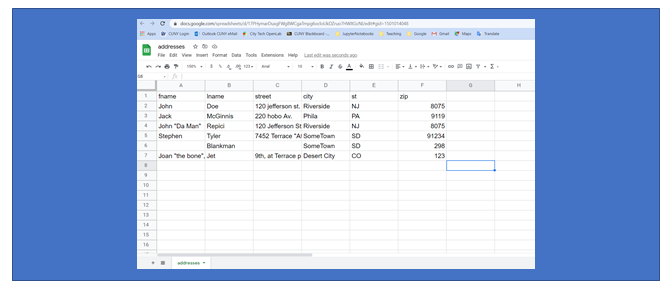



---



### Import the **csv** Module

Import the **csv** module.  If you need to install the **csv** module, use:



```
!pip install csv
```



In [ ]:
import csv

### Matrices Are Lists of Lists

How we can represent a three-by-three matrix of the values from 1 through 9.

In [ ]:
matrix = [[1,2,3],[4,5,6],[7,8,9]]

for row in matrix:
    print(row)

How we reference the value 5 in that matrix and how we reference 7 in that matrix.

In [ ]:
print(matrix[1][1])
print(matrix[2][0])


### Reading the addresses.csv Sample File

Now we can used the reader() method in the **csv** library to read the file **addresses.txt**.  The following code creates an iterable csv object named **csv_content**.

In [ ]:
# set the file pointer to the start
csv_handle.seek(0)

# read the file into a .csv object
csv_content = csv.reader(csv_handle) # csv_handle reads the text file addresses.csv


Because csv_content is an iterable, using it as the argument for the print() function will print information about the object in memory.

In [ ]:
print(csv_content)

In [ ]:
type(csv_content)

In [ ]:
dir(csv_content)

To print the lines in the iterable object csv_content, we create a for loop with a local variable for the elements in the iterable.  In this example the elements are the lines of the file.

In [ ]:
for whatever in csv_content:
    print(whatever)

In [ ]:
csv_handle.seek(0)
for line in csv_handle:
    print(line, end="")


Each line of the iterable csv_content is a list with a string for each of the values which were separated by commas in the comma-separated value (CSV) file **addresses.csv**.  *Notice how the csv module has taken care of missing values and other complexities in the file.*

Remember to reset the file point to the start of the file if you intend to read the file again!

In [ ]:
csv_handle.seek(0)

*let's close `csv_handle` first*

In [ ]:
csv_handle.close()

We can also use the `with` statement to open the file in a context-sensitive code block and then a for loop to print each line.

In [ ]:
with open("/content/gdrive/My Drive/data/addresses.csv", "r") as csv_handle:
    csv_content = csv.reader(csv_handle)

    for row in csv_content:
        print(row)


We can reference the elements of each of the lists in the matrixed iterable csv_content by referencing the index number of the column which interestst us.  Remember that elements are indexed beginning with zero (0).  If we wanted to print street addresses and ZIP codes from addresses.csv, we could use the following code.

In [ ]:
with open("/content/gdrive/My Drive/data/addresses.csv", "r") as csv_handle:
    csv_content = csv.reader(csv_handle)

    for line in csv_content:
        print(line[2], line[5])


To skip the header information in the first row of the CSV file, we can issue call the next() function with the iterable object name as its argument, when our pointer is at the top of the iterable object.

In [ ]:
with open("/content/gdrive/My Drive/data/addresses.csv", "r") as csv_handle:
    csv_content = csv.reader(csv_handle)

    next(csv_content)

    for line in csv_content:
        print(line[2], line[5])


### Writing a New CSV File

We can use our csv object csv_content to write a new CSV file.  In the new file we will use vertical bars "|" as a separator instead of commas.

1.   To write the new file, we need to open a file handle with a write option ("w") and the new file name as arguments.

2.   We then create a new csv object using the csv **writer()** method and we give writer() the new file handle as an argument as well as delimiter='|' to give us vertical bars as delimiters.

3.   To write the original rows of the csv_content we read from the file handle csv_input, we used the **csv_output's** method **writerow()** and give it the name of the object we want to write to each row on the new file.  In this example we are using the variable **line** from our for loop as the content to write to each new row in the new file.



In [ ]:
# with open("/content/gdrive/My Drive/data/addresses.csv", "r") as csv_input:
with open("/content/addresses.csv", "r") as csv_input:
    csv_content = csv.reader(csv_input)

    with open ("/content/new_addresses.csv", "w") as new_output:
        csv_output = csv.writer(new_output, delimiter='|')

        for line in csv_content:
            csv_output.writerow(line)


In [ ]:
csv_output.close()

We should see a new file in the directory we specified in our open statement.

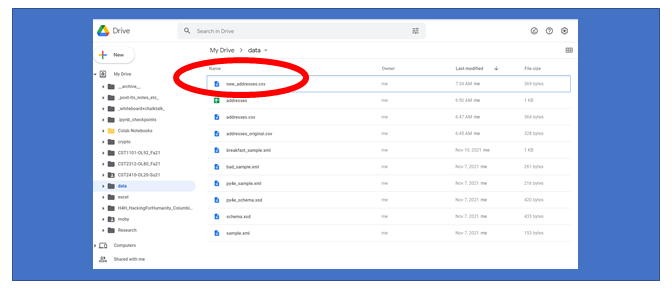

The new_addresses.csv file is now all of our csv_content content but separated by vertical bars ("|").  In our example, that new file is a .csv file which we can view in a text editor...

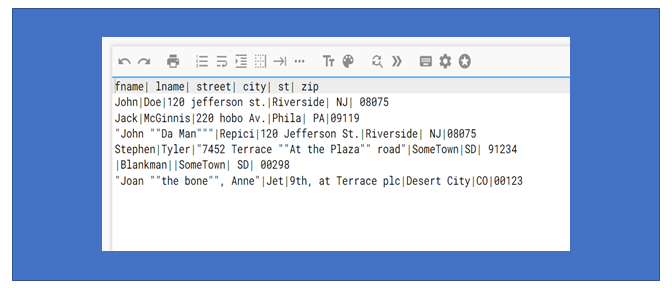

... or as a spreadsheet.

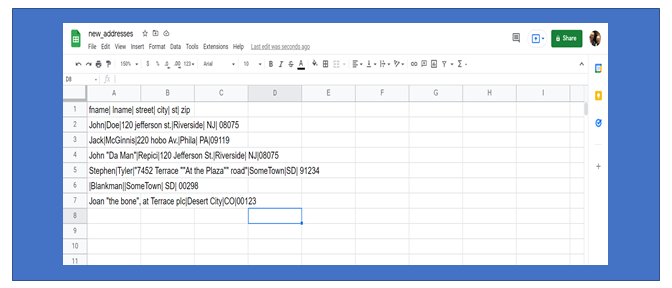

Vertical bars may be easier for humans to read in a text file but they are not a common separator of data in csv files.  It is more common to use tabs ("\t") to delimit data in .csv file.  We can use the same code but replace our delimiter with a tab ("\t") to write a tab-delimted, .csv file.

In [ ]:
with open("/content/gdrive/My Drive/data/addresses.csv", "r") as csv_handle:
    csv_content = csv.reader(csv_handle)

    with open ("/content/new_addresses.tsv", "w") as new_output:
        csv_output = csv.writer(new_output, delimiter='\t')

        for line in csv_content:
            csv_output.writerow(line)


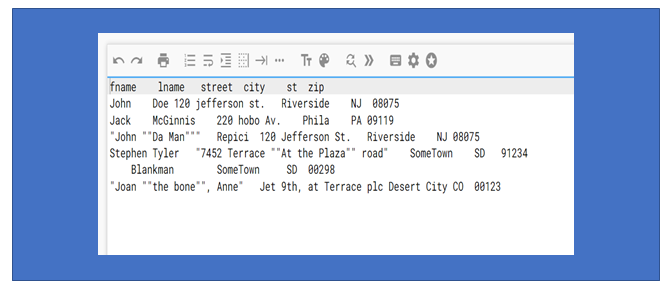

To read a .csv file which uses a delimiter other than commas, the delimiter string must be passed as a parameter to the reader() method.

In [ ]:
with open("/content/gdrive/My Drive/data/new_addresses.tsv", "r") as csv_handle:
    csv_content = csv.reader(csv_handle, delimiter='\t')

    for line in csv_content:
        print(line)

Not specifiying the correct delimiter will result in incorrect element values in the csv object.

In [ ]:
with open("/content/gdrive/My Drive/data/new_addresses.csv", "r") as csv_handle:
    # csv_content = csv.reader(csv_handle, delimiter='\t')
    csv_content = csv.reader(csv_handle)

    for line in csv_content:
        print(line)     # printing each row/line
        print(line[0])  # printing just the inner-list elements

### Reading CSV Files with DictReader() Function

A powerful way to work with csv files and the csv module is to read the files as dictionary items with the **DictReader()** function from the csv module.  The following example demonstrates the use of **DictReader()**.


In [ ]:
import csv

In [ ]:
with open("/content/new_addresses.tsv", "r") as csv_handle:
    csv_dict = csv.DictReader(csv_handle, delimiter='\t')

    for line in csv_dict:
        print(line)

In [ ]:
with open("/content/new_addresses.csv", "r") as csv_handle:
    # csv_content = csv.reader(csv_handle, delimiter='\t')
    csv_content = csv.reader(csv_handle)
    for line in csv_content:
        print(line)

The result is an ordered dictionary where each line is using the string values from the first row of the CSV file (new_addresses.csv) as a key for **key:value** pairs of elements of each subsequent row (rows #2 through n).

This object gives us a more intuitive way to refence the data in columns of the spreadsheet which the CSV file would populate.  Remember though we use the terminology CSV, the delimters in the file may be tabs ('\t') or some other string.

Now, we can print the street addresses and ZIP codes for each row without needing to calculate their index numbers.

In [ ]:
with open("/content/new_addresses.tsv", "r") as csv_handle:
    csv_content = csv.DictReader(csv_handle, delimiter='\t')

    for line in csv_content:
        print(line[' street'], line[' zip'])

### Writing CSV Files with DictWriter()

We can write a new file from our csv_content object using DictWriter but we will need to specify the field names (column headings) to write to the new file.  We can also change the order of the fields when we write the new CSV file.

1.   Let's create a list of field names as a variable called **output_fields**

2.   Then we can use our earlier code, replacing writer() with DictWriter() and giving the list our output fields names (**output_fields**) as an argument **fieldnames= **to the **DictWriter** method.

In [ ]:
with open("/content/gdrive/My Drive/data/addresses.csv", "r") as csv_handle:
    csv_content = csv.DictReader(csv_handle)

    for line in csv_content:
            print(line)

In [ ]:
with open("/content/addresses.csv", "r") as csv_handle:
    csv_content = csv.DictReader(csv_handle)

    with open ("/content/reordered_addresses.tsv", "w") as new_output:
        output_fields = [' zip', ' st', ' city', ' lname', 'fname', ' street']
        csv_output = csv.DictWriter(new_output, fieldnames=output_fields, delimiter='\t')

        for row in csv_content:
            csv_output.writerow(row)

Our reordered output can be viewed in a text editor or as a spreadsheet.

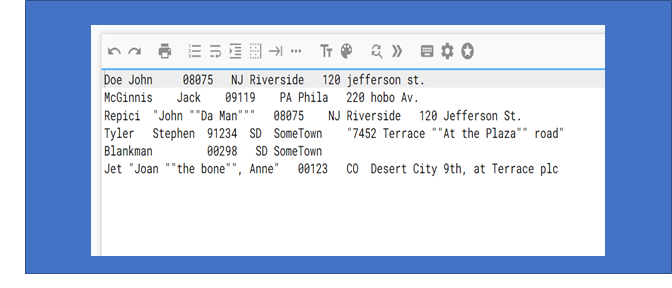

Notice that using DictReader to create a dictionary object resulted in writerow() not writing the field names or header in the first row (element 0) of the CSV file we read.

To include the headers (field names) in the new file written using a dictionary object, insert a line of code which invokes the writeheader() method for the dictionary object created by DictWriter().

Then use a for loop to write the remaining rows of the CSV file from the elements of the dictionary object.


In [ ]:
with open("/content/addresses.csv", "r") as csv_handle:
    csv_content = csv.DictReader(csv_handle)

    with open ("/content/reordered_addresses.tsv", "w") as new_output:
        output_fields = [' lname', 'fname', ' zip', ' st', ' city', ' street']
        csv_output = csv.DictWriter(new_output, fieldnames=output_fields, delimiter='\t')

        csv_output.writeheader()

        for line in csv_content:
            csv_output.writerow(line)

Now our output file will include the field names as a header row (element 0).

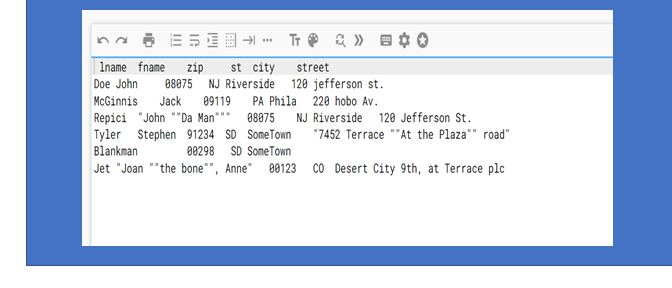

### Removing Fields from CSV File(s) Written

To delete columns of information using a dictionary:

1.   Remove the field name to be deleted from the list of field names which will be used by **writerow()**.

2.   Delete the field name key from the dictionary before any code which attempts to write the dictionary elements -- e.g. **writeheader()**, **writerow()**

The following example excludes the fname and lname fields from the data being written.

In [ ]:
with open("/content/gdrive/My Drive/data/addresses.csv", "r") as csv_handle:
    csv_content = csv.DictReader(csv_handle)

    with open ("/content/gdrive/My Drive/data/sanitized_addresses.csv", "w") as new_output:
        output_fields = [' zip', ' st', ' city', ' street']
        csv_output = csv.DictWriter(new_output, fieldnames=output_fields, delimiter='\t')

        csv_output.writeheader()

        for line in csv_content:
            del line['fname']
            del line[' lname']
            csv_output.writerow(line)

Our sanitized output no longer includes first names (**fname**) and last names (**lname**).

Note: in practical circumatances this example data would not be consider anonymized as it still contains street addresses which could easily be mapped to PII using OSINT.


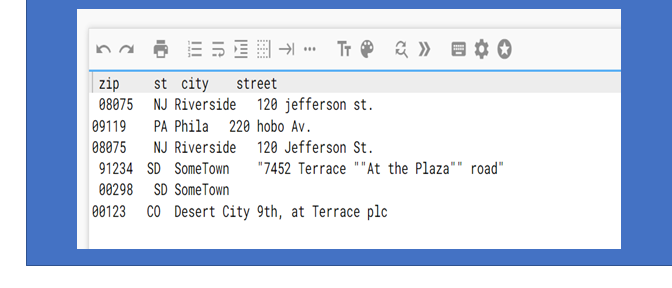

What scrubbing could we have done to our original **addresses.csv** file?



---



### **OWID Covid `csv` File Example**

We can look at daily Covid-19 data from the pandemic using the following example which reads a csv file from OWID (Our World in Data).

Source:

[**OWID Complete Covid-19 Data**](https://github.com/owid/covid-19-data/tree/master/public/data)

*This is an excellent source to use in practicing access methods and scripts using the same data across both CSV and JSON formats.*


**The complete Our World in Data COVID-19 dataset**

OWID's complete COVID-19 dataset is available in CSV, XLSX, and JSON formats, and includes all of the historical data on the pandemic up to the date of publication.

The CSV and XLSX files follow a format of 1 row per location and date. The JSON version is split by country ISO code, with static variables and an array of daily records.

The variables represent all of our main data related to confirmed cases, deaths, hospitalizations, and testing, as well as other variables of potential interest.

*Static files used in this notebook are current as of: 23-Nov-2021.*

*Files accessed through GitHub, JSON, etc. are as current as the latest OWID update.*



Let's start by using the **vaccinations.csv** file available from OWID using the GitHub repo as our source.

The URL for the raw version of vaccinations.csv on OWID's GitHub repo is:


```
https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv
```



 First, let's be sure that we have the **CSV** module imported.

 Then, let's be sure that we have our **data** directory in Google Drive mounted to Colab's Content folder.

In [ ]:
import csv

from google.colab import drive
drive.mount('/content/gdrive')


Alternatively, you may take a current copy of `vaccinations.csv` into the `/content` folder of your **Colab** session with the following command:    

```
!curl "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv" -o vaccinations.csv

```

In [ ]:
!curl "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv" -o vaccinations.csv

It may be helpful to look at row[0] of the file to understand the field names.


In [ ]:
with open("/content/vaccinations.csv", "r") as csv_handle:
    csv_content = csv.reader(csv_handle)

    row0 = next(csv_content)

    print("The csv file fields are:")
    i = 0
    while i < len(row0) :
        print("Column #" + str(i) + ": \t", row0[i])
        i += 1


We can open the **vaccinations.csv** file with the **csv** module and print some of its columns.

In [ ]:
with open("/content/gdrive/My Drive/data/vaccinations.csv", "r") as csv_handle:
    csv_content = csv.reader(csv_handle)

    for line in csv_content:
        print(line[0], "\t", line[2], "\t", line[9], "\t", line[11])


Let's read the vaccinations.csv file into a dictionary.

In [ ]:
with open("/content/gdrive/My Drive/data/vaccinations.csv", "r") as csv_handle:
    csv_content = csv.DictReader(csv_handle)

    for line in csv_content:
        print(line["location"], "\t", line["date"], "\t", line["total_vaccinations_per_hundred"], "\t", line["people_fully_vaccinated_per_hundred"])


At this point we have a fully populated dictionary with the vaccinations.csv data from OWID.  We can work with that dictionary to generate a wealth of analysis.

*Of course, just looking at the data we see missing data and realize that any analysis will need to incorporate data scrubbing, ETL, and enrichment.*

In [ ]:
vaccination_counts = dict()
daily_vax_txt = ""

with open("/content/gdrive/My Drive/data/vaccinations.csv", "r") as csv_handle:
    csv_content = csv.DictReader(csv_handle)

    for line in csv_content:
        iso = line["iso_code"]
        daily_vax_txt = line["daily_vaccinations"]
        try:
            daily_vax = int(daily_vax_txt.lstrip().rstrip())
            # daily_vax_txt = daily_vax_txt.rstrip()
            # daily_vax = int(daily_vax_txt)
        except:
            daily_vax = 0
        # print(iso, "|" + daily_vax_txt + "|", type(daily_vax_txt))
        if iso[:5] != "OWID":
            vaccination_counts[iso] = vaccination_counts.get(iso, 0) + daily_vax



In [ ]:
print(vaccination_counts)

In [ ]:
print(vaccination_counts["CRI"])



---



### **<u>Team/Group Exercise</u>**

**Group 1**    
*Team Name?*    
*  


**Group 2**    
*Team Name?*    
*  


**Group 3**    
*Team Name?*    
*  


**Group 4**    
*Team Name?*    
*  







---



**Team Exercise - Instructions**

1.   Break into teams based on your class Group/Team

2.   Choose one of the .csv files from https://people.sc.fsu.edu/~jburkardt/data/csv/csv.html

3.   Write a Python program which:

   a.   reads the file you chose as dictionary item

   b.   creates a count for some category field in the chosen file's data

4.   Return to the main room in class and be prepared to demonstrate your program




**Please <mark>DO NOT Use Any of the Following Files</mark> for Your Exercise -**

**addresses.csv**, an example file with 6 records. There are 6 fields.

**cities.csv**, an example file with 128 records. There are 10 fields.

**grades.csv**, an example file with 16 records and 9 fields: First name, Last Name, SSN, Test1, Test2, Test3, Test4, Final, Grade. There is also an initial header line.

**hooke.csv**, Hooke's Law demo. A spring experiment is carried out twice. Spring 1 and spring 2 are loaded with 0, 1, 2, ..., 9 equal weights and their lengths are measured. Each record contains the index, weight, spring 1 length and spring 2 length. There is also an initial header line.

**lead_shot.csv**, For each grade of lead shot, a record lists the grade name, the weight in ounces, weight in grams, diameter in inches, diameter in millimeters, and the number of pellets per ounce. There are 25 records. There is also an initial header line.

**letter_frequency.csv**, In a large text, the frequency and percentage frequency of each of the 26 letters of the alphabet was determined. There are 26 records, each with three values. There is also an initial header line.

**snakes_count_10.csv**, game length for one-player version of Snakes and Ladders, 10 records, each with 2 values: Game Index, Game Length. There is also an initial header line.

**tally_cab.csv**, Tallahassee Cab Fares, 8 records, each with 2 values: Distance(miles), Fare($). There is also an initial header line.

**taxables.csv,** Taxable items, 10 records: index, item name, price, tax, price plus tax. There is also an initial header line.




---



**DO NOT** use any of the files listed above.   Thank you!

In [ ]:
# Your Code Here

###**For More information on Python and `.CSV` Files Watch:**    

* [**Python Tutorial: CSV Module - How to Read, Parse, and Write CSV Files**](https://youtu.be/q5uM4VKywbA) *Youtube video*.    

